## import math

### LOAD AND SORT NAMES OF COLUMNS
dd = pd.read_csv('./Mulran_generalization_2021-07-24_12:35_errors.txt', sep=r' ', header=0)
print(dd)
print(dd["Rot.err.(deg/100m)"])
dd = dd.rename(columns={'length': 'Path length',})
dd = dd.rename(columns={'Rot.err.(deg/100m)': 'Rotation error (deg/100m)',})
dd = dd.rename(columns={'Trans.err.(%)': 'Translation errror (%) [m/m]',})
#df['Rot.err.(deg/100m)'] = df['Rot.err.(deg/100m)'].apply(lambda x: x*180.0/math.pi*100)
dd['Rotation error (deg/100m)'] = dd['Rotation error (deg/100m)']*180/math.pi*100
dd['Translation errror (%) [m/m]'] = dd['Translation errror (%) [m/m]']*100

ax1=sns.lineplot(data=dd, x="Path length", y="Rotation error (deg/100m)", color='red',label = 'Rotation error (deg/100m)', legend=False)
#plt.legend(loc='upper center')
#sns_plot.tick_params(axis='y', labelcolor='red')
#sns_plot = sns.pointplot(x="Path length", y="Rot.err.(deg/100m)", data=dd, legend_out=False,palette=sns.color_palette(["#FF0000"]),linestyles=["-", "--"])
ax2 = ax1.twinx()
sns.lineplot(data=dd, x="Path length", y="Translation errror (%) [m/m]", color='blue',label = 'Translation errror (%) [m/m]',legend=False,ax=ax2)
#ax2.tick_params(axis='y', labelcolor='blue')
ax1.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85))
ax2.figure.legend(loc='upper center',bbox_to_anchor=(0.65, 0.85))
#plt.legend(loc='upper right')
#p=[ax1, ax2]
#sns_plot.legend(p, [p_.get_label() for p_ in p],
#loc= 'center', fontsize= 'small')


#sns_plot = sns.pointplot(x="Path length", y="Trans.err.(%)", kind="box", dodge=True, data=dd, legend_out=False, par=p)
#sns_plot.legend(loc='upper right', ncol=1)
plt.title('Error vs path distance')
plt.xlim(100,800)
plt.grid()
plt.show()
ax1.figure.savefig('demo-file.pdf')

#ax1.savefig('./output/Transl_error_submap_keyframes.eps', format='eps')
#ax1.savefig('./output/Transl_error_submap_keyframes.png', format='png', dpi=1500)





5         KAIST01
0         KAIST02
8         KAIST03
3           DCC01
6           DCC02
1           DCC03
4     Riverside01
7     Riverside02
2     Riverside03
Name: sequence, dtype: category
Categories (9, object): [' KAIST01' < ' KAIST02' < ' KAIST03' < ' DCC01' ... ' DCC03' < ' Riverside01' < ' Riverside02' < ' Riverside03']
Trans.err.(%) 2.6665555555555556
Rot.err.(deg/100m)0.8712222222222222
RPE(m)0.06977777777777777
ATE(m)30.101222222222223
Sequences: 
[' KAIST01', ' KAIST02', ' KAIST03', ' DCC01', ' DCC02', ' DCC03', ' Riverside01', ' Riverside02', ' Riverside03']
Categories (9, object): [' KAIST01' < ' KAIST02' < ' KAIST03' < ' DCC01' ... ' DCC03' < ' Riverside01' < ' Riverside02' < ' Riverside03']
Trans.err.(%) [3.267 2.504 2.919 2.581 2.328 2.267 2.862 2.675 2.596]
['3.267/1.136' '2.504/0.909' '2.919/1.135' '2.581/0.712' '2.328/0.748'
 '2.267/0.768' '2.862/0.957' '2.675/0.817' '2.596/0.659']
RPE/ATE
['0.075/34.501' '0.074/27.837' '0.075/33.683' '0.085/10.714'
 '0.052/17.215

3.058823529411765

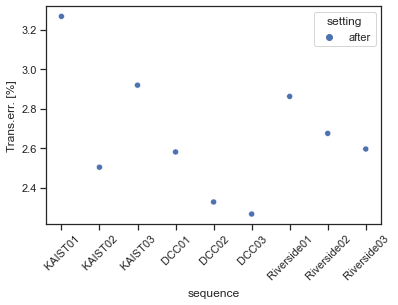

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from pandas.api.types import CategoricalDtype


#path="./oxford-cfear1_2021-09-22_18:18_eval.csv"
#path="./oxford-cfear2_2021-09-22_18:20_eval.csv"
#path="./oxford-cfear3_2021-09-22_18:22_eval.csv"
#path="./mulran_cfear-1_2021-09-22_18:32_eval.csv"
#path="./mulran_cfear-2_2021-09-22_18:33_eval.csv"
path="./mulran_cfear-3_2021-09-22_18:34_eval.csv"


df = pd.read_csv(path, sep=r',', header=0)

sns.set_theme(style="ticks", color_codes=True)
sns.set(style="ticks")

#### UNCOMMENT FOR MULRAN ####
cat_size_order = CategoricalDtype(
    [' KAIST01',' KAIST02',' KAIST03',' DCC01',' DCC02',' DCC03',' Riverside01',' Riverside02',' Riverside03'], 
    ordered=True
)
##############################

#### UNCOMMENT FOR OXFORD ####
#cat_size_order = CategoricalDtype(
#    [" 2019-01-10-12-32-52-radar-oxford-10k", " 2019-01-16-13-09-37-radar-oxford-10k", " 2019-01-17-13-26-39-radar-oxford-10k", " 2019-01-18-14-14-42-radar-oxford-10k", " 2019-01-18-15-20-12-radar-oxford-10k", " 2019-01-16-11-53-11-radar-oxford-10k", " 2019-01-10-11-46-21-radar-oxford-10k"," 2019-01-18-14-46-59-radar-oxford-10k"], 
#    ordered=True
#)
##############################

df['sequence'] = df["sequence"].astype(cat_size_order)
df=df.sort_values('sequence')

print(df["sequence"])
df['setting'] = df.apply (lambda row: "after", axis=1)
df['for_copy'] = df.apply (lambda row: str(row["Trans.err. [%]"])+"/"+str(row["Rot.err. [deg/100m]"]), axis=1)
df['for_copy_ATE'] = df.apply (lambda row: str(row["RPE [m]"])+"/"+str(row["ATE [m]"]), axis=1)
#print(df.columns)
df = df.rename(columns={'resolution r': 'resolution r [m]'})

sns.scatterplot(data=df, x="sequence", y="Trans.err. [%]", hue="setting")
plt.xticks(rotation=45)
print("Trans.err.(%) "+str(df["Trans.err. [%]"].mean()))
print("Rot.err.(deg/100m)"+str(df["Rot.err. [deg/100m]"].mean()))
print("RPE(m)"+str(df["RPE [m]"].mean()))
print("ATE(m)"+str(df["ATE [m]"].mean()))
print("Sequences: ") 
print(df["sequence"].values)
print("Trans.err.(%) "+str(df["Trans.err. [%]"].values))
print(df["for_copy"].values)
print("RPE/ATE")
print(df["for_copy_ATE"].values)
#print(df["Rot.err.(deg/100m)"])
#print(df["sequence"].to_numpy())
2.6/.85